In [1]:
img_directory = '/Users/rwilliams/Downloads/img_align_celeba'
batch_size = 32

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(imgs):
    fig = plt.figure()
    nimgs = len(imgs)
    for i in range(nimgs):
        a=fig.add_subplot(1,nimgs,i+1)
        plt.imshow(imgs[i])
        plt.axis('off')

In [3]:
import scipy as sp
from skimage.transform import resize
from skimage.util import crop
import numpy as np
import os

def load_img(id):
    filename = '%06d.jpg' % id
    path = os.path.join(img_directory, filename)
    return sp.ndimage.imread(path)

# resize smaller, cropping if necessary
def resize_crop(img, desired_dims):
    img_dims = np.array(img[:,:,0].shape)
    desired_dims = np.array(desired_dims)
    
    scale = desired_dims / img_dims
    resize_dim = np.argmax(scale)
    # this is the dim we'll resize to, the other
    # dimension will need to be cropped
       
    new_dims = (scale[resize_dim] * img_dims).astype('int_')
    img_resized = resize(img, new_dims)
    # resize the image

    # now crop along the longer dimension
    crop_dim = np.argmin(scale)
    crop_from_edge = int((new_dims[crop_dim] - desired_dims[crop_dim])/2)
    
    # assume the crop is the first dim
    crops = [[crop_from_edge, crop_from_edge], [0, 0]]
    # swap if it's not
    if (crop_dim == 1): crops = list(reversed(crops))
    # add a crop of 0 for third dim (which is really the channels dim)
    # crop fn wants list of lists, with inner list amount to cut at 
    # each edge of the dim
    crops = crops + [[0, 0]]
    img_cropped = crop(img_resized, crops)
    
    # finally, resize again in case crop_from_edge was an odd number
    img_final = resize(img_cropped, desired_dims)
    
    return img_final

In [4]:
batch = np.array([resize_crop(load_img(i+1), (64, 64)) for i in range(32)])

/Users/rwilliams/anaconda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [21]:
from model import Vaegan

model = Vaegan(img_shape=(64, 64, 3), batch_size=32)

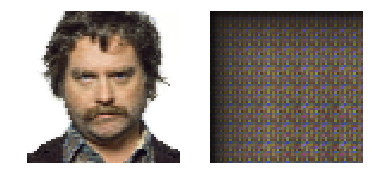

In [17]:
id = 0
y = model.model.predict(batch)[id]

imshow([batch[id], y])

In [22]:
save_directory = '/Users/rwilliams/Desktop/zach'
save_model = '/Users/rwilliams/Desktop/model.hdf5'
save_idx = 0

In [ ]:
start = save_idx
stop = save_idx + 2000

for i in range(start, stop):
    model.model.fit(x=batch, y=batch, epochs=10)
    zach = model.model.predict(batch)[0]
    path = os.path.join(save_directory, '%04d.jpg' % i)
    sp.misc.imsave(path, zach)
    save_idx = i

model.model.save(save_model)

Epoch 1/10
32/32 [==============================] - 0s - loss: 0.6815
Epoch 2/10
32/32 [==============================] - 0s - loss: 0.6763
Epoch 3/10
32/32 [==============================] - 0s - loss: 0.6814
Epoch 4/10
32/32 [==============================] - 0s - loss: 0.6813
Epoch 5/10
32/32 [==============================] - 0s - loss: 0.6761
Epoch 6/10
32/32 [==============================] - 0s - loss: 0.6812
Epoch 7/10
32/32 [==============================] - 0s - loss: 0.6760
Epoch 8/10
32/32 [==============================] - 0s - loss: 0.6760
Epoch 9/10
32/32 [==============================] - 0s - loss: 0.6810
Epoch 10/10
32/32 [==============================] - 0s - loss: 0.6759
Epoch 1/10
32/32 [==============================] - 1s - loss: 0.6758
Epoch 2/10
32/32 [==============================] - 0s - loss: 0.6808
Epoch 3/10
32/32 [==============================] - 0s - loss: 0.6807
Epoch 4/10
32/32 [==============================] - 1s - loss: 0.6806
Epoch 5/10
32/32 [=

32/32 [==============================] - 1s - loss: 0.6727
Epoch 8/10
32/32 [==============================] - 1s - loss: 0.6726
Epoch 9/10
32/32 [==============================] - 1s - loss: 0.6726
Epoch 10/10
32/32 [==============================] - 1s - loss: 0.6770
Epoch 1/10
32/32 [==============================] - 1s - loss: 0.6725
Epoch 2/10
32/32 [==============================] - 1s - loss: 0.6725
Epoch 3/10
32/32 [==============================] - 1s - loss: 0.6725
Epoch 4/10
32/32 [==============================] - 1s - loss: 0.6725
Epoch 5/10
32/32 [==============================] - 1s - loss: 0.6772
Epoch 6/10
32/32 [==============================] - 1s - loss: 0.6772
Epoch 7/10
32/32 [==============================] - 1s - loss: 0.6726
Epoch 8/10
32/32 [==============================] - 1s - loss: 0.6772
Epoch 9/10
32/32 [==============================] - 1s - loss: 0.6772
Epoch 10/10
32/32 [==============================] - 1s - loss: 0.6771
Epoch 1/10
32/32 [===========

32/32 [==============================] - 1s - loss: 0.6703
Epoch 5/10
32/32 [==============================] - 1s - loss: 0.6741
Epoch 6/10
32/32 [==============================] - 1s - loss: 0.6700
Epoch 7/10
32/32 [==============================] - 1s - loss: 0.6699
Epoch 8/10
32/32 [==============================] - 1s - loss: 0.6741
Epoch 9/10
32/32 [==============================] - 1s - loss: 0.6741
Epoch 10/10
32/32 [==============================] - 1s - loss: 0.6741
Epoch 1/10
32/32 [==============================] - 1s - loss: 0.6717
Epoch 2/10
32/32 [==============================] - 1s - loss: 0.6810
Epoch 3/10
32/32 [==============================] - 1s - loss: 0.6777
Epoch 4/10
32/32 [==============================] - 1s - loss: 0.6874
Epoch 5/10
32/32 [==============================] - 1s - loss: 0.6814
Epoch 6/10
32/32 [==============================] - 1s - loss: 0.6826
Epoch 7/10
32/32 [==============================] - 1s - loss: 0.6924
Epoch 8/10
32/32 [============

32/32 [==============================] - 1s - loss: 0.7183
Epoch 2/10
32/32 [==============================] - 1s - loss: 0.7176
Epoch 3/10
32/32 [==============================] - 1s - loss: 0.7021
Epoch 4/10
32/32 [==============================] - 1s - loss: 0.7167
Epoch 5/10
32/32 [==============================] - 1s - loss: 0.7017
Epoch 6/10
32/32 [==============================] - 1s - loss: 0.7014
Epoch 7/10
32/32 [==============================] - 1s - loss: 0.7011
Epoch 8/10
32/32 [==============================] - 1s - loss: 0.7150
Epoch 9/10
32/32 [==============================] - 1s - loss: 0.6998
Epoch 10/10
32/32 [==============================] - 1s - loss: 0.6993
Epoch 1/10
32/32 [==============================] - 1s - loss: 0.6991
Epoch 2/10
32/32 [==============================] - 1s - loss: 0.7162
Epoch 3/10
32/32 [==============================] - 1s - loss: 0.7163
Epoch 4/10
32/32 [==============================] - 1s - loss: 0.6984
Epoch 5/10
32/32 [============

32/32 [==============================] - 1s - loss: 0.6883
Epoch 9/10
32/32 [==============================] - 1s - loss: 0.6960
Epoch 10/10
32/32 [==============================] - 1s - loss: 0.6959
Epoch 1/10
32/32 [==============================] - 1s - loss: 0.6958
Epoch 2/10
32/32 [==============================] - 1s - loss: 0.6957
Epoch 3/10
32/32 [==============================] - 1s - loss: 0.6956
Epoch 4/10
32/32 [==============================] - 1s - loss: 0.6954
Epoch 5/10
32/32 [==============================] - 1s - loss: 0.6953
Epoch 6/10
32/32 [==============================] - 1s - loss: 0.6951
Epoch 7/10
32/32 [==============================] - 1s - loss: 0.6950
Epoch 8/10
32/32 [==============================] - 0s - loss: 0.6878
Epoch 9/10
32/32 [==============================] - 1s - loss: 0.6876
Epoch 10/10
32/32 [==============================] - 1s - loss: 0.6875
Epoch 1/10
32/32 [==============================] - 1s - loss: 0.6872
Epoch 2/10
32/32 [===========

32/32 [==============================] - 1s - loss: 0.6799
Epoch 6/10
32/32 [==============================] - 0s - loss: 0.6800
Epoch 7/10
32/32 [==============================] - 0s - loss: 0.6950
Epoch 8/10
32/32 [==============================] - 0s - loss: 0.6802
Epoch 9/10
32/32 [==============================] - 1s - loss: 0.6952
Epoch 10/10
32/32 [==============================] - 1s - loss: 0.6804
Epoch 1/10
32/32 [==============================] - 1s - loss: 0.6952
Epoch 2/10
32/32 [==============================] - 1s - loss: 0.6807
Epoch 3/10
32/32 [==============================] - 1s - loss: 0.6810
Epoch 4/10
32/32 [==============================] - 1s - loss: 0.6953
Epoch 5/10
32/32 [==============================] - 1s - loss: 0.6953
Epoch 6/10
32/32 [==============================] - 1s - loss: 0.6952
Epoch 7/10
32/32 [==============================] - 1s - loss: 0.6812
Epoch 8/10
32/32 [==============================] - 1s - loss: 0.6814
Epoch 9/10
32/32 [============

32/32 [==============================] - 1s - loss: 0.7252
Epoch 3/10
32/32 [==============================] - 1s - loss: 0.7257
Epoch 4/10
32/32 [==============================] - 1s - loss: 0.7259
Epoch 5/10
32/32 [==============================] - 1s - loss: 0.7255
Epoch 6/10
32/32 [==============================] - 1s - loss: 0.7253
Epoch 7/10
32/32 [==============================] - 1s - loss: 0.7250
Epoch 8/10
32/32 [==============================] - 1s - loss: 0.7411
Epoch 9/10
32/32 [==============================] - 1s - loss: 0.7407
Epoch 10/10
32/32 [==============================] - 1s - loss: 0.7231
Epoch 1/10
32/32 [==============================] - 1s - loss: 0.7390
Epoch 2/10
32/32 [==============================] - 1s - loss: 0.7215
Epoch 3/10
32/32 [==============================] - 1s - loss: 0.7373
Epoch 4/10
32/32 [==============================] - 1s - loss: 0.7362
Epoch 5/10
32/32 [==============================] - 1s - loss: 0.7190
Epoch 6/10
32/32 [============